In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [ ]:
#load the dataset 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# no. features
n_features = 28*28
#no. of classes 
n_classes = 1
batch_size = 32

In [ ]:
#reshape the data
x_train= x_train.reshape(-1,n_features)
x_test= x_test.reshape(-1,n_features)
# normalize the samples between 0 and 1
x_train,x_test = x_train/255.0, x_test/255.0

V#00888037, In this code I used the last two digits of my V# as the digits to be classified.

In [ ]:
#function to filter the dataset and return data that has 3,7 labels as 1 and -1
def filter_data(x,y):
 filter = (y==3) | (y==7)
 x,y = x[filter],y[filter]
 y=np.where(y == 3, 1, -1)
 return x,y

In [ ]:
#filter data
x_train,y_train = filter_data(x_train,y_train)
x_test,y_test = filter_data(x_test,y_test)

In [ ]:
#reshape y_train 
y_train = tf.reshape(y_train, (y_train.shape[0],n_classes))
y_test = tf.reshape(y_test, (y_test.shape[0],n_classes))

In [ ]:
# Prepare the training dataset.
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

# Prepare the validation dataset.
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(batch_size)

In [ ]:
#linear regression function
def regression(x):
 return tf.matmul(x,w)+b

In [ ]:
#logistic function(cost function)
def loss_func (y_hat,y):
 return tf.reduce_mean(tf.math.log(1+tf.math.exp(-y*y_hat)))

In [ ]:
# L2 regularization function
def l2_reg(cost,beta):
  regularizer =tf.nn.l2_loss(w)
  cost+= beta * regularizer
  return cost

In [ ]:
# accuracy function 
def accuracy(y_hat, y):
  positives = tf.math.logical_and(tf.math.equal(y, 1), tf.math.greater_equal(y_hat, 0))
  negatives= tf.math.logical_and(tf.math.equal(y, -1), tf.math.less(y_hat, 0))
  correct_predictions = tf.math.logical_or(positives,negatives)
  return tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

In [ ]:
# initalize weight and bias
w = tf.Variable(tf.random.normal([n_features, n_classes], stddev=0.01), name='W1')
b = tf.Variable(tf.zeros([n_classes]), name='b1')

In [ ]:
# this optimizer will do gradient descent for us
lr = 0.001;
optimizer = tf.optimizers.SGD(learning_rate=lr)
#optimizer = tf.optimizers.Adam(learning_rate=lr)

Train and test data in batches

In [ ]:
# # Set training parameters
# n_epochs = 200
# beta =0.01
# train_losses = []
# test_losses = []
# train_accuracy = []
# test_accuracy = []

# # Set up the training loop and begin training
# for epoch in range(n_epochs):
#   batch_train_loss = [] 
#   batch_train_acc = []
#   batch_test_loss = [] 
#   batch_test_acc = []

#   # Iterate over the training data
#   for x_batch, y_batch in train_dataset:
#     with tf.GradientTape() as tape:
#       pred = regression(x_batch)
#       loss = loss_func(pred, tf.cast(y_batch,tf.float32))
#       loss = l2_reg(loss,beta)
#     acc = accuracy(pred, y_batch)
#     # Update the parameters with respect to the gradient calculations
#     gradients = tape.gradient(loss, [w,b])
#     optimizer.apply_gradients(zip(gradients, [w,b]))
#     # append loss and accuracy of training batches
#     batch_train_loss.append(loss)
#     batch_train_acc.append(acc)

#   # Iterate over the testing data
#   for x_batch, y_batch in test_dataset:
#     pred = regression(x_batch)
#     loss = loss_func(pred, tf.cast(y_batch,tf.float32))
#     acc = accuracy(pred, y_batch)
#     # append loss and accuracy of testing batches
#     batch_test_loss.append(loss)
#     batch_test_acc.append(acc)

#   # average the batch loss and accuracy and append it to a list
#   train_loss=tf.reduce_mean(batch_train_loss)
#   train_acc = tf.reduce_mean(batch_train_acc)
#   test_loss = tf.reduce_mean(batch_test_loss)
#   test_acc = tf.reduce_mean(batch_test_acc)
#   train_losses.append(train_loss)
#   train_accuracy.append(train_acc)
#   test_losses.append(test_loss)
#   test_accuracy.append(test_acc)

#   if epoch % 10 == 0:
#     print('Epoch: [{:}/{:}]\t\t-----------------------'.format(epoch, n_epochs))
#     print('training loss: {:.3f}\t training accuracy: {:.3f}'.format(train_loss,train_acc))
#     print('test loss: {:.3f}\t test accuracy: {:.3f}'.format(test_loss,test_acc))

In [ ]:
n_epochs = 5000
beta =0.01
train_losses = []
test_losses = []
train_accuracy = []
test_accuracy = []

# Set up the training loop and begin training
for epoch in range(n_epochs):

  # Iterate over the training data
    with tf.GradientTape() as tape:
      pred = regression(x_train)
      train_loss = loss_func(pred, tf.cast(y_train,tf.float32))
      train_loss = l2_reg(train_loss,beta)
    train_acc = accuracy(pred, y_train)
    # Update the parameters with respect to the gradient calculations
    gradients = tape.gradient(train_loss, [w,b])
    optimizer.apply_gradients(zip(gradients, [w,b]))
    # append loss and accuracy of training batches
    train_losses.append(train_loss)
    train_accuracy.append(train_acc)

  # Iterate over the testing data
    test_pred = regression(x_test)
    test_loss = loss_func(test_pred, tf.cast(y_test,tf.float32))
    test_acc = accuracy(test_pred, y_test)
    # append loss and accuracy of testing batches
    test_losses.append(test_loss)
    test_accuracy.append(test_acc)
    if epoch % 10 == 0:
      print('Epoch: [{:}/{:}]-----------------------'.format(epoch, n_epochs))
      print('training loss: {:.3f}\t\t training accuracy: {:.3f}'.format(train_loss,train_acc))
      print('test loss: {:.3f}\t\t test accuracy: {:.3f}'.format(test_loss,test_acc))
      

Epoch: [0/5000]-----------------------
training loss: 0.690		 training accuracy: 0.524
test loss: 0.688		 test accuracy: 0.542
Epoch: [10/5000]-----------------------
training loss: 0.673		 training accuracy: 0.717
test loss: 0.671		 test accuracy: 0.734
Epoch: [20/5000]-----------------------
training loss: 0.658		 training accuracy: 0.840
test loss: 0.655		 test accuracy: 0.850
Epoch: [30/5000]-----------------------
training loss: 0.642		 training accuracy: 0.900
test loss: 0.640		 test accuracy: 0.908
Epoch: [40/5000]-----------------------
training loss: 0.628		 training accuracy: 0.930
test loss: 0.625		 test accuracy: 0.933
Epoch: [50/5000]-----------------------
training loss: 0.614		 training accuracy: 0.944
test loss: 0.611		 test accuracy: 0.944
Epoch: [60/5000]-----------------------
training loss: 0.601		 training accuracy: 0.952
test loss: 0.598		 test accuracy: 0.952
Epoch: [70/5000]-----------------------
training loss: 0.588		 training accuracy: 0.956
test loss: 0.585	

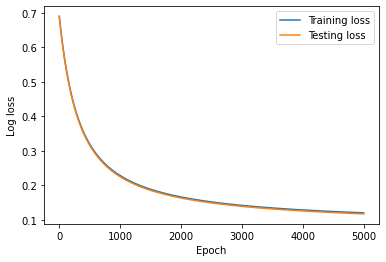

In [ ]:
from matplotlib import pyplot as plt
plt.plot(range(n_epochs), train_losses, label = "Training loss")
plt.plot(range(n_epochs), test_losses, label = "Testing loss")
plt.xlabel("Epoch")
plt.ylabel("Log loss")
plt.legend()

Text(0.5, 1.0, 'Accuracy vs training iterations')

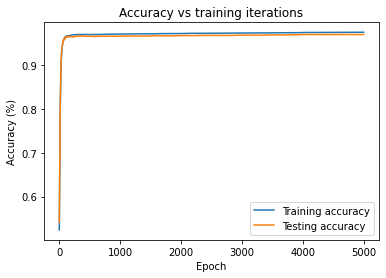

In [ ]:
plt.plot(range(n_epochs), train_accuracy, label = "Training accuracy")
plt.plot(range(n_epochs), test_accuracy, label = "Testing accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title("Accuracy vs training iterations")

# References:
1. https://www.tensorflow.org/guide/core/logistic_regression_core
2. https://builtin.com/data-science/guide-logistic-regression-tensorflow-20
3. https://adventuresinmachinelearning.com/python-tensorflow-tutorial/
4. https://www.ritchieng.com/machine-learning/deep-learning/tensorflow/regularization/
5. https://neuraspike.com/blog/l2-regularization-with-python/
